<a href="https://colab.research.google.com/github/fatima2112/gaiaDR3ML/blob/master/Calibrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install GaiaXPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.0/812.0 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.7/885.7 KB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.4/361.4 KB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 81.0 MB/s eta 0:00:00


In [3]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

data = pd.read_csv("gdrive/MyDrive/calibrate/XP_CONTINUOUS-Gaia DR3 308866701872125568.csv")
data.head()

Mounted at /content/gdrive


,source_id,solution_id,bp_basis_function_id,bp_degrees_of_freedom,bp_n_parameters,bp_n_measurements,bp_n_rejected_measurements,bp_standard_deviation,bp_chi_squared,bp_coefficients,...,rp_n_parameters,rp_n_measurements,rp_n_rejected_measurements,rp_standard_deviation,rp_chi_squared,rp_coefficients,rp_coefficient_errors,rp_coefficient_correlations,rp_n_relevant_bases,rp_relative_shrinking
0,308866701872125568,4545469030156206080,56,1117,55,1172,46,1.439717,2315.3008,"(4359777.273910325, 581384.9657800844, -77748....",...,55,1325,63,1.767027,3965.4263,"(1.5584199896418598E7, 2563048.137275565, 8089...","(11791.401, 12655.38, 11520.796, 10488.419, 11...","(-0.20425212, -0.13397367, 0.11055192, 0.03322...",32,0.999999


In [4]:
# Import the tool
from gaiaxpy import calibrate
# Path to file with XP CONTINUOUS RAW data (csv, ecsv, fits, or xml)

f = data

In [5]:
# El espectro calibrado que es un pandas DataFrame (calibrated_spectra)
calibrated_spectra, sampling = calibrate(f)
calibrated_spectra

,source_id,flux,flux_error
0,308866701872125568,"[1.8545887904429264e-14, 1.9515631422050145e-1...","[5.214474777878777e-15, 3.992541487358003e-15,..."


In [6]:
#Muestreo dado en Numpy, valores que corresponden en longitudes de onda (nm)
calibrated_spectra, sampling = calibrate(f)
sampling

array([ 336.,  338.,  340.,  342.,  344.,  346.,  348.,  350.,  352.,
        354.,  356.,  358.,  360.,  362.,  364.,  366.,  368.,  370.,
        372.,  374.,  376.,  378.,  380.,  382.,  384.,  386.,  388.,
        390.,  392.,  394.,  396.,  398.,  400.,  402.,  404.,  406.,
        408.,  410.,  412.,  414.,  416.,  418.,  420.,  422.,  424.,
        426.,  428.,  430.,  432.,  434.,  436.,  438.,  440.,  442.,
        444.,  446.,  448.,  450.,  452.,  454.,  456.,  458.,  460.,
        462.,  464.,  466.,  468.,  470.,  472.,  474.,  476.,  478.,
        480.,  482.,  484.,  486.,  488.,  490.,  492.,  494.,  496.,
        498.,  500.,  502.,  504.,  506.,  508.,  510.,  512.,  514.,
        516.,  518.,  520.,  522.,  524.,  526.,  528.,  530.,  532.,
        534.,  536.,  538.,  540.,  542.,  544.,  546.,  548.,  550.,
        552.,  554.,  556.,  558.,  560.,  562.,  564.,  566.,  568.,
        570.,  572.,  574.,  576.,  578.,  580.,  582.,  584.,  586.,
        588.,  590.,

# Sampling
Un muestreo (sampling) puede ser pasado a una función
El sampling numpy.geomspace(330,1049.9999999999, 361) podría emplearse para mejorar la resolución en el extremo azul.

In [8]:
import numpy as np

first_spectra, sampling = calibrate(f)
first_spectra_geom, geom_sampling = calibrate(f, sampling=np.geomspace(330,1049.9999999999, 361))

first_spectra_geom

,source_id,flux,flux_error
0,308866701872125568,"[2.0104343917082907e-13, 9.858403214351052e-14...","[4.5672839645220154e-14, 2.321777443679429e-14..."


In [9]:
geom_sampling

array([ 330.        ,  331.06270585,  332.12883396,  333.19839534,
        334.27140105,  335.34786218,  336.42778986,  337.51119526,
        338.59808957,  339.68848403,  340.78238991,  341.87981851,
        342.98078119,  344.08528932,  345.19335432,  346.30498765,
        347.42020079,  348.53900528,  349.66141267,  350.78743458,
        351.91708264,  353.05036853,  354.18730396,  355.32790069,
        356.4721705 ,  357.62012524,  358.77177675,  359.92713695,
        361.08621779,  362.24903123,  363.41558931,  364.58590407,
        365.75998763,  366.93785211,  368.1195097 ,  369.3049726 ,
        370.49425307,  371.6873634 ,  372.88431594,  374.08512304,
        375.28979713,  376.49835066,  377.71079611,  378.92714603,
        380.14741299,  381.3716096 ,  382.59974851,  383.83184242,
        385.06790407,  386.30794624,  387.55198174,  388.80002343,
        390.05208422,  391.30817705,  392.56831489,  393.83251079,
        395.1007778 ,  396.37312904,  397.64957766,  398.93013

Default sampling


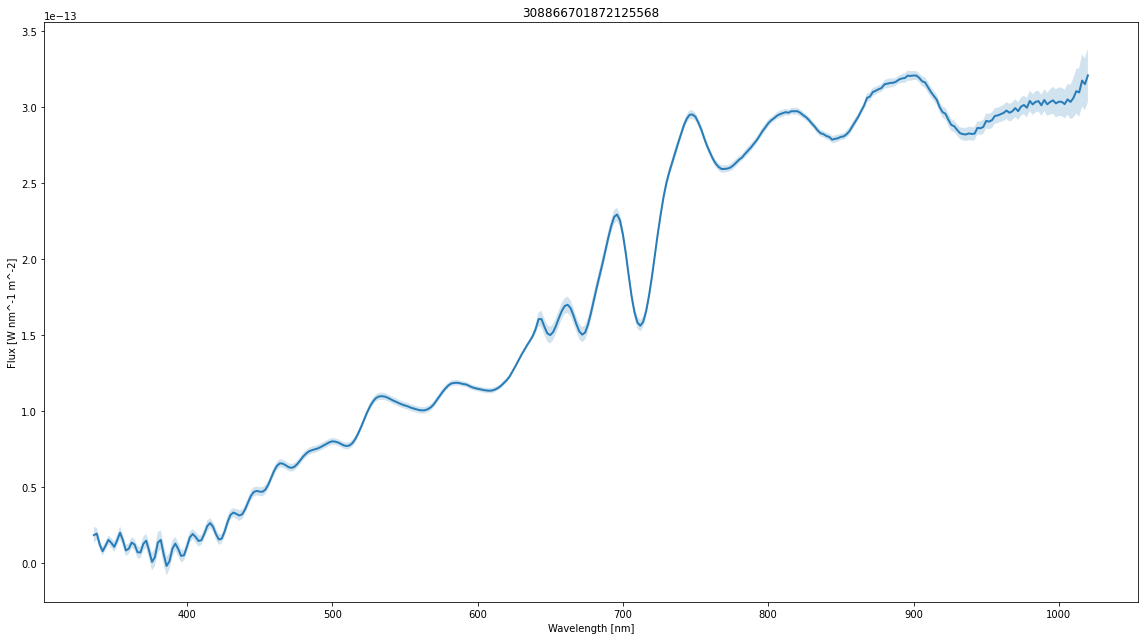

Geometric progression (log) sampling


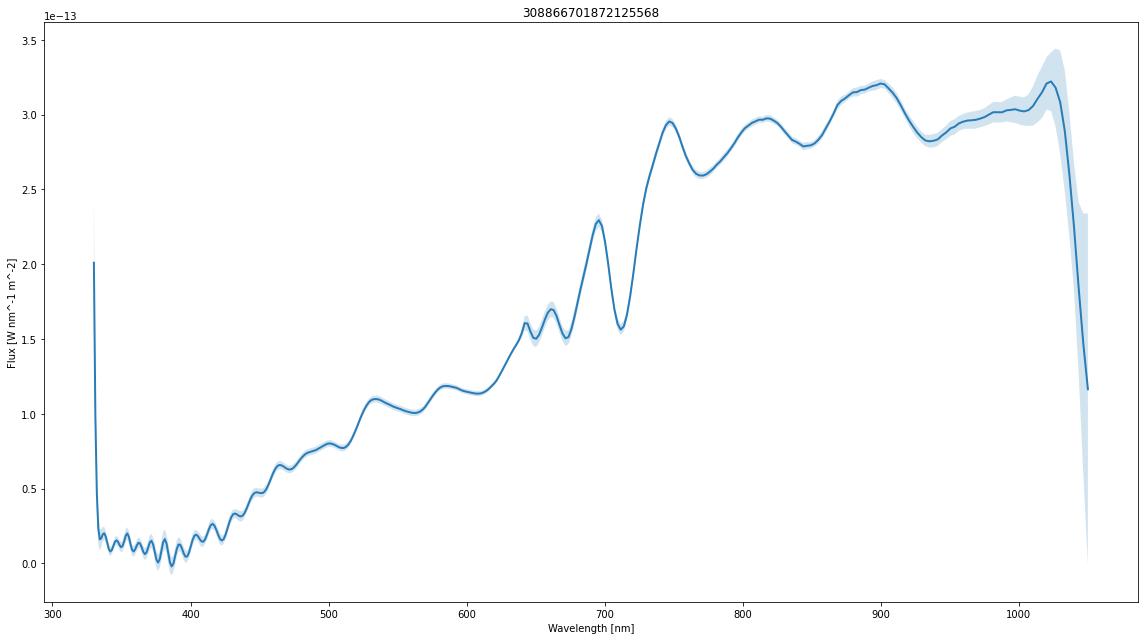

In [10]:
from gaiaxpy import plot_spectra

print('Default sampling')
# Do not show the legend as there's only one source in the data
first=plot_spectra(first_spectra, sampling=sampling)
print('Geometric progression (log) sampling')
second=plot_spectra(first_spectra_geom, sampling=geom_sampling)

In [12]:
data = pd.concat([first_spectra, first_spectra_geom]).reset_index(drop=True)
data['source_id'][0] = 'Sampling Default'
data['source_id'][1] = 'Geometric Progression'

data



,source_id,flux,flux_error
0,Sampling Default,"[1.8545887904429264e-14, 1.9515631422050145e-1...","[5.214474777878777e-15, 3.992541487358003e-15,..."
1,Geometric Progression,"[2.0104343917082907e-13, 9.858403214351052e-14...","[4.5672839645220154e-14, 2.321777443679429e-14..."


# Truncation
Hace referencia probablemente al proceso de eliminar o "truncar" valores atípicos o extremos en los datos de estrellas, antes de aplicar la calibración.

Los valores atípicos o extremos son aquellos que están muy alejados de los valores promedio y pueden ser causados por errores en las mediciones

La eliminación de estos valores puede ayudar a mejorar la precisión de la calibración, ya que se minimizan los efectos de estas mediciones anómalas.

In [ ]:
data2 = pd.read_csv("gdrive/MyDrive/calibrate/XP_CONTINUOUS-Gaia DR3 369176289048301312.csv")

second_source = data2 # We'll use only the second source (sourceId 4) in the demonstration


In [ ]:
non_truncated_spectra, sampling = calibrate(second_source) # truncation is False by default
truncated_spectra, _ = calibrate(second_source, truncation=True)

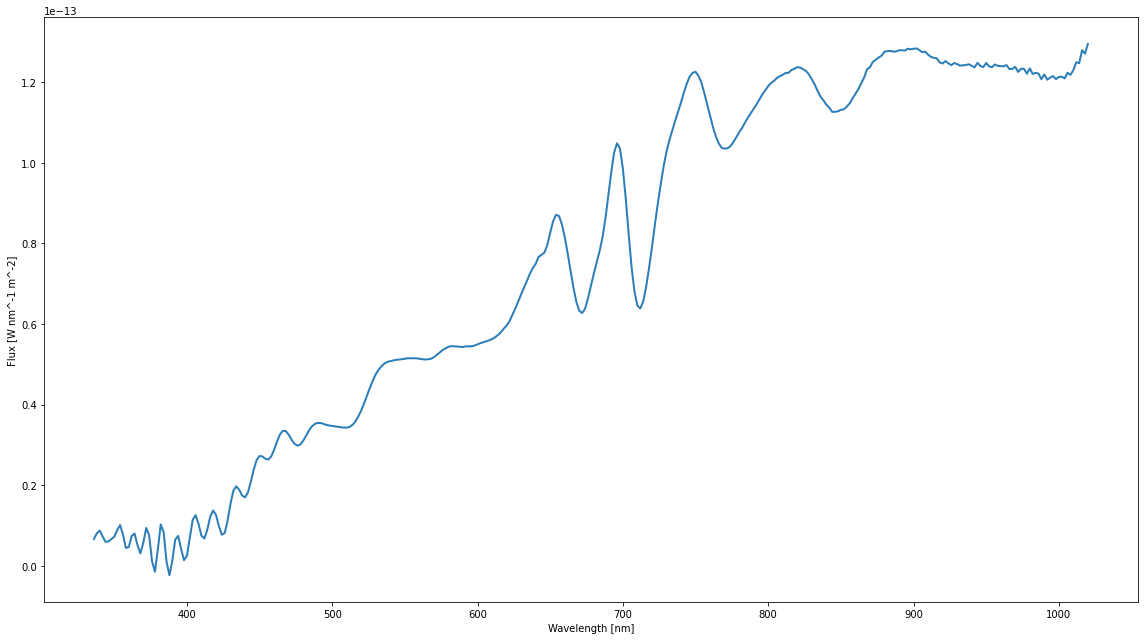

In [ ]:
plot_spectra(non_truncated_spectra, sampling=sampling, multi=True, legend=False)

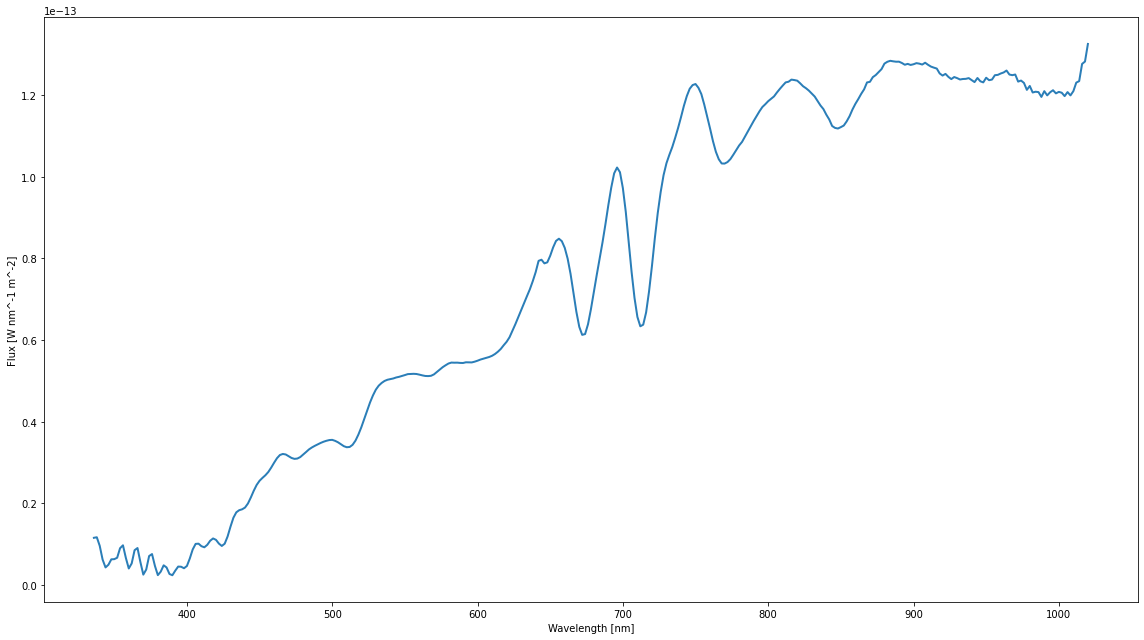

In [ ]:
plot_spectra(truncated_spectra, sampling=sampling, multi=True, legend=False)